In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font='Arial Unicode MS', font_scale=1.2)        # 使用MAC时解决Seaborn中文显示问题

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips = sns.load_dataset("tips")
tips.columns = ['消费',"小费",'性别','是否吸烟','日期','时段','聚餐人数']
tips['是否吸烟'] = tips['是否吸烟'].map({'No': "否", 'Yes': "是"})
tips['时段'] = tips['时段'].map({'Dinner': "晚餐", 'Lunch': "午餐"})
tips['性别'] = tips['性别'].map({'Female': "女", 'Male': "男"})
tips['日期'] = tips['日期'].map({'Thur': "周四", 'Fri': "周五",'Sat': "周六",'Sun': "周日"})
tips

,消费,小费,性别,是否吸烟,日期,时段,聚餐人数
0,16.99,1.01,女,否,周日,晚餐,2
1,10.34,1.66,男,否,周日,晚餐,3
2,21.01,3.50,男,否,周日,晚餐,3
3,23.68,3.31,男,否,周日,晚餐,2
4,24.59,3.61,女,否,周日,晚餐,4
...,...,...,...,...,...,...,...
239,29.03,5.92,男,否,周六,晚餐,3
240,27.18,2.00,女,是,周六,晚餐,2
241,22.67,2.00,男,是,周六,晚餐,2
242,17.82,1.75,男,否,周六,晚餐,2


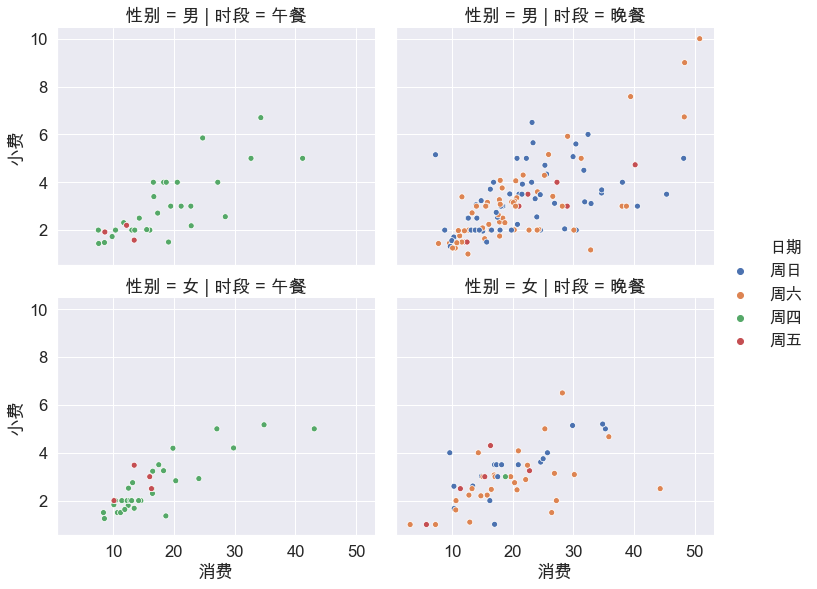

In [4]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.relplot(data=tips, x="消费", y="小费", hue="日期", col="时段", row="性别")
plt.gcf().set_size_inches(11.7, 8.27)

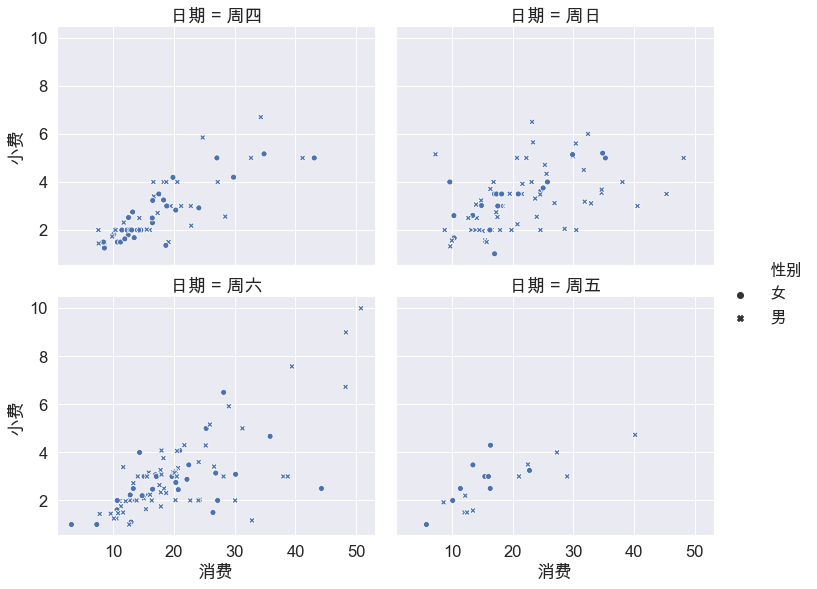

In [5]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.relplot(data=tips, x="消费", y="小费", style="性别",col="日期", col_wrap=2, 
                col_order={"周四","周日","周六","周五"})
plt.gcf().set_size_inches(11.7, 8.27)

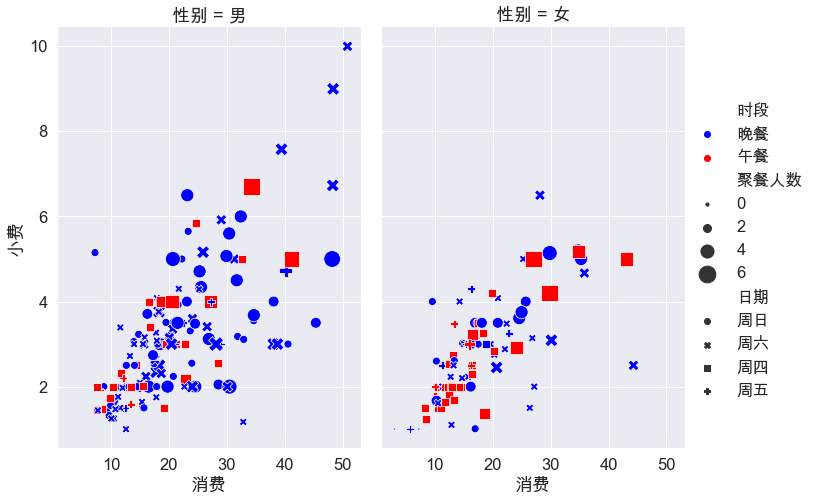

In [6]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.relplot(data=tips, x="消费", y="小费",col="性别",hue="时段", size="聚餐人数", style="日期",
                palette=["blue", "red"], sizes=(10, 280))
plt.gcf().set_size_inches(11.7, 8.27)

In [11]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [16]:
import matplotlib.pyplot as plt
# Your plotting code here
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [41]:
fmri = sns.load_dataset("fmri")
fmri.columns = ['对象',"时间点",'事件','区域','信号']
fmri['事件'] = fmri['事件'].map({'stim': "刺激", 'cue': "暗示"})
fmri['区域'] = fmri['区域'].map({'parietal': "顶叶", 'frontal': "额叶"})
fmri

,对象,时间点,事件,区域,信号
0,s13,18,刺激,顶叶,-0.017552
1,s5,14,刺激,顶叶,-0.080883
2,s12,18,刺激,顶叶,-0.081033
3,s11,18,刺激,顶叶,-0.046134
4,s10,18,刺激,顶叶,-0.037970
...,...,...,...,...,...
1059,s0,8,暗示,额叶,0.018165
1060,s13,7,暗示,额叶,-0.029130
1061,s12,7,暗示,额叶,-0.004939
1062,s11,7,暗示,额叶,-0.025367


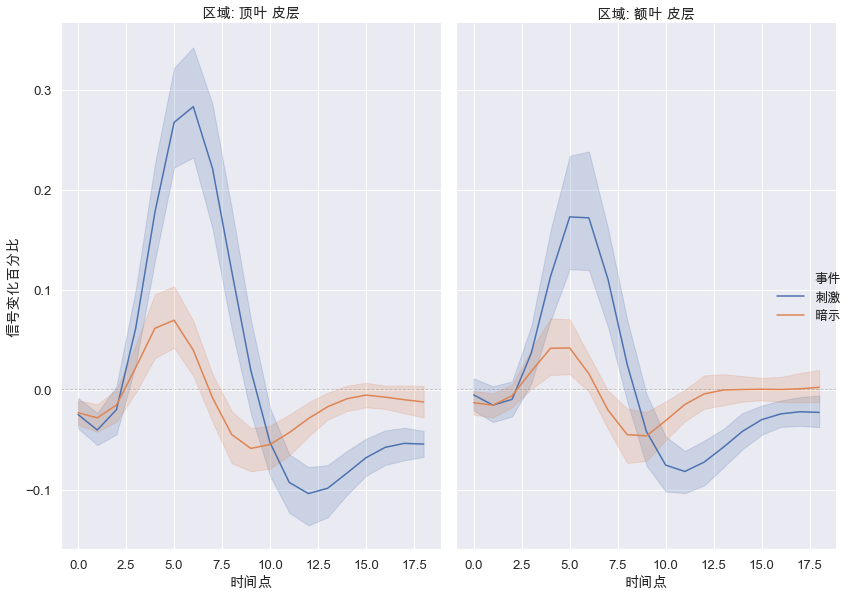

In [81]:
g = sns.relplot(data=fmri,x="时间点", y="信号",hue="事件", style="事件", col="区域",
                height=4, aspect=2.1, kind="line", dashes=False)
plt.gcf().set_size_inches(11.7, 8.27)
(g.map(plt.axhline, y=0, color=".7", dashes=(2,1), zorder=0)
  .set_axis_labels("时间点", "信号变化百分比")
  .set_titles("区域: {col_name} 皮层"))

In [55]:
flights_wide = sns.load_dataset("flights")
flights_wide.columns = ['年份',"月份",'乘客数']
flights_wide['月份'] = flights_wide['月份'].map({
        'January': "元月", 'February': "二月",'March': "三月",'April': "四月"
        ,'May': "五月", 'June': "六月",'July': "七月",'August': "八月"
        ,'September': "九月", 'October': "十月",'November': "十一月",'December': "十二月"})
# flights_wide=flights_wide.pivot('年份',"月份",'乘客数')
flights_wide

,年份,月份,乘客数
0,1949,元月,112
1,1949,二月,118
2,1949,三月,132
3,1949,四月,129
4,1949,五月,121
...,...,...,...
139,1960,八月,606
140,1960,九月,508
141,1960,十月,461
142,1960,十一月,390


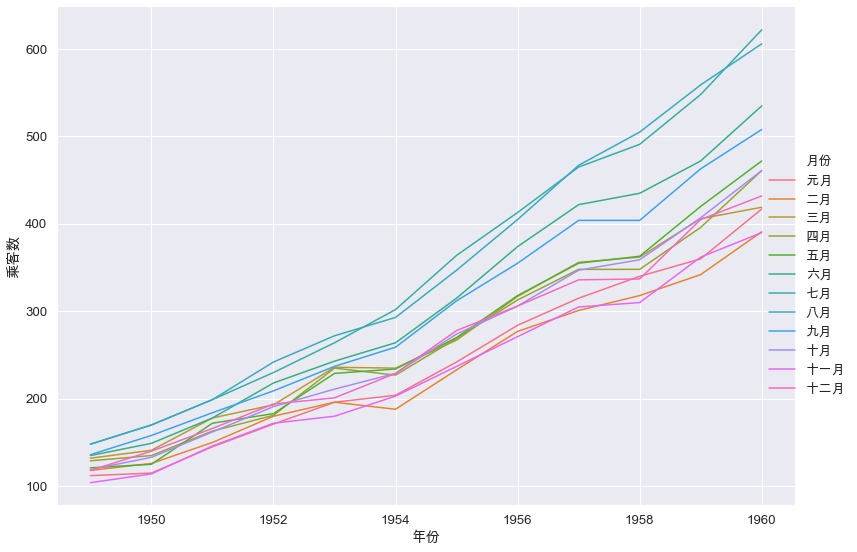

In [82]:
g = sns.relplot(data=flights_wide,x="年份", y="乘客数",hue="月份",
                height=6, aspect=3, kind="line")
plt.gcf().set_size_inches(11.7, 8.27)

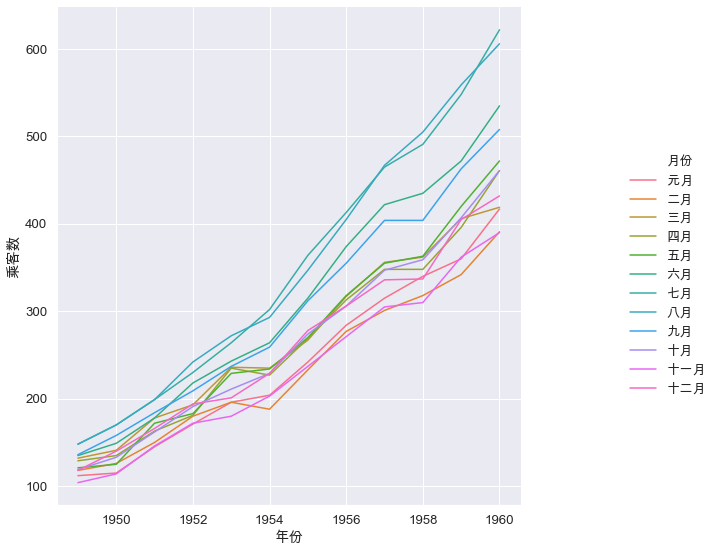

In [84]:
g = sns.relplot(data=flights_wide,x="年份", y="乘客数",hue="月份",
                height=6, aspect=0.7, kind="line")
plt.gcf().set_size_inches(11.7, 8.27)